In [3]:
!pip install mysql 


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import mysql.connector

# Database connection
conn = mysql.connector.connect(
    host='192.155.100.47',
    user='youtube',
    password='!qR%xf|L3@',
    database='insta_scraper'
)

# SQL query to join insta_profile_scraper and user_posts tables
query = """
SELECT 
    ips.id as profile_id,
    ips.username,
    ips.followers_count,
    ips.follows_count,
    ips.posts_count,
    up.post_id as post_id,
    up.like_count,
    up.comment_count,
    up.video_view_count
FROM 
    insta_profile_scraper ips
JOIN 
    user_posts up ON ips.id = up.user_id
"""

# Execute the query and fetch the data
df = pd.read_sql(query, conn)

# Calculate total likes, views, comments for each user
# df_grouped = df.groupby(['profile_id', 'username', 'followers_count', 'following_count', 'post_count']).agg(
#     total_likes=pd.NamedAgg(column='likes', aggfunc='sum'),
#     total_views=pd.NamedAgg(column='views', aggfunc='sum'),
#     total_comments=pd.NamedAgg(column='comments', aggfunc='sum')
# ).reset_index()

# Close the database connection
conn.close()

# Display the dataframe
# import ace_tools as tools; tools.display_dataframe_to_user(name="Instagram DataFrame", dataframe=df_grouped)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26584\3702321033.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
df.head(5)

,profile_id,username,followers_count,follows_count,posts_count,post_id,like_count,comment_count,video_view_count
0,50058,zitter,20,0,4,105234,2,0,0
1,50058,zitter,20,0,4,143819,2,0,0
2,50058,zitter,20,0,4,143962,3,0,0
3,50058,zitter,20,0,4,156169,5,0,0
4,287535,ziti,63,0,1,1797502,18,18,0


In [4]:
df_grouped = df.groupby(['profile_id', 'username', 'followers_count', 'follows_count', 'posts_count']).agg(
    total_likes=pd.NamedAgg(column='like_count', aggfunc='sum'),
    total_comments=pd.NamedAgg(column='comment_count', aggfunc='sum'),
    total_views=pd.NamedAgg(column='video_view_count', aggfunc='sum')
).reset_index()

In [5]:
df_grouped.head(5)

,profile_id,username,followers_count,follows_count,posts_count,total_likes,total_comments,total_views
0,50058,zitter,20,0,4,12,0,0
1,287535,ziti,63,0,1,18,18,0
2,1503892,zither,6,0,7,16,0,0
3,2682316,zosterops,1189,187,193,11460,933,14872
4,6591524,roccolovesclover,779,1443,1596,29635,2626,2019


In [6]:
df_grouped['engagement_rate'] = df_grouped['total_likes']/df_grouped['posts_count']

In [7]:
df_grouped['interection_rate']=df_grouped['total_comments']/df_grouped['posts_count']

In [8]:
df_grouped.head(5)

,profile_id,username,followers_count,follows_count,posts_count,total_likes,total_comments,total_views,engagement_rate,interection_rate
0,50058,zitter,20,0,4,12,0,0,3.000000,0.000000
1,287535,ziti,63,0,1,18,18,0,18.000000,18.000000
2,1503892,zither,6,0,7,16,0,0,2.285714,0.000000
3,2682316,zosterops,1189,187,193,11460,933,14872,59.378238,4.834197
4,6591524,roccolovesclover,779,1443,1596,29635,2626,2019,18.568296,1.645363


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239915 entries, 0 to 239914
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   profile_id        239915 non-null  int64 
 1   username          239915 non-null  object
 2   followers_count   239915 non-null  int64 
 3   follows_count     239915 non-null  int64 
 4   posts_count       239915 non-null  int64 
 5   post_id           239915 non-null  int64 
 6   like_count        239915 non-null  int64 
 7   comment_count     239915 non-null  int64 
 8   video_view_count  239915 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 16.5+ MB


In [10]:
df_grouped['engagement_per_post'] = (df_grouped['total_likes'] + df_grouped['total_comments']) / df_grouped['posts_count']

# Calculate engagement normalized by followers
df_grouped['engagement_normalized'] = (df_grouped['total_likes'] + df_grouped['total_comments']) / (df_grouped['followers_count'] * df_grouped['posts_count'])


In [11]:
df_grouped.head()

,profile_id,username,followers_count,follows_count,posts_count,total_likes,total_comments,total_views,engagement_rate,interection_rate,engagement_per_post,engagement_normalized
0,50058,zitter,20,0,4,12,0,0,3.000000,0.000000,3.000000,0.150000
1,287535,ziti,63,0,1,18,18,0,18.000000,18.000000,36.000000,0.571429
2,1503892,zither,6,0,7,16,0,0,2.285714,0.000000,2.285714,0.380952
3,2682316,zosterops,1189,187,193,11460,933,14872,59.378238,4.834197,64.212435,0.054005
4,6591524,roccolovesclover,779,1443,1596,29635,2626,2019,18.568296,1.645363,20.213659,0.025948


In [24]:
threshold = 0.1

# Calculate expected genuine followers based on the threshold
df_grouped['expected_genuine_followers'] = df_grouped['total_likes'] / (threshold * df_grouped['posts_count'])

# Calculate potential fake followers
df_grouped['fake_followers'] = df_grouped['followers_count'] - df_grouped['expected_genuine_followers']
df_grouped['fake_followers'] = df_grouped['fake_followers'].apply(lambda x: max(x, 0))

# Calculate fake follower percentage
df_grouped['fake_follower_percentage'] = (df_grouped['fake_followers'] / df_grouped['followers_count']) * 100

In [25]:
df_grouped.head()

,profile_id,username,followers_count,follows_count,posts_count,total_likes,total_comments,total_views,engagement_rate,interection_rate,engagement_per_post,engagement_normalized,expected_genuine_followers,fake_followers,fake_follower_percentage
0,50058,zitter,20,0,4,12,0,0,3.000000,0.000000,3.000000,0.150000,30.000000,0.000000,0.000000
1,287535,ziti,63,0,1,18,18,0,18.000000,18.000000,36.000000,0.571429,180.000000,0.000000,0.000000
2,1503892,zither,6,0,7,16,0,0,2.285714,0.000000,2.285714,0.380952,22.857143,0.000000,0.000000
3,2682316,zosterops,1189,187,193,11460,933,14872,59.378238,4.834197,64.212435,0.054005,593.782383,595.217617,50.060355
4,6591524,roccolovesclover,779,1443,1596,29635,2626,2019,18.568296,1.645363,20.213659,0.025948,185.682957,593.317043,76.163934


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


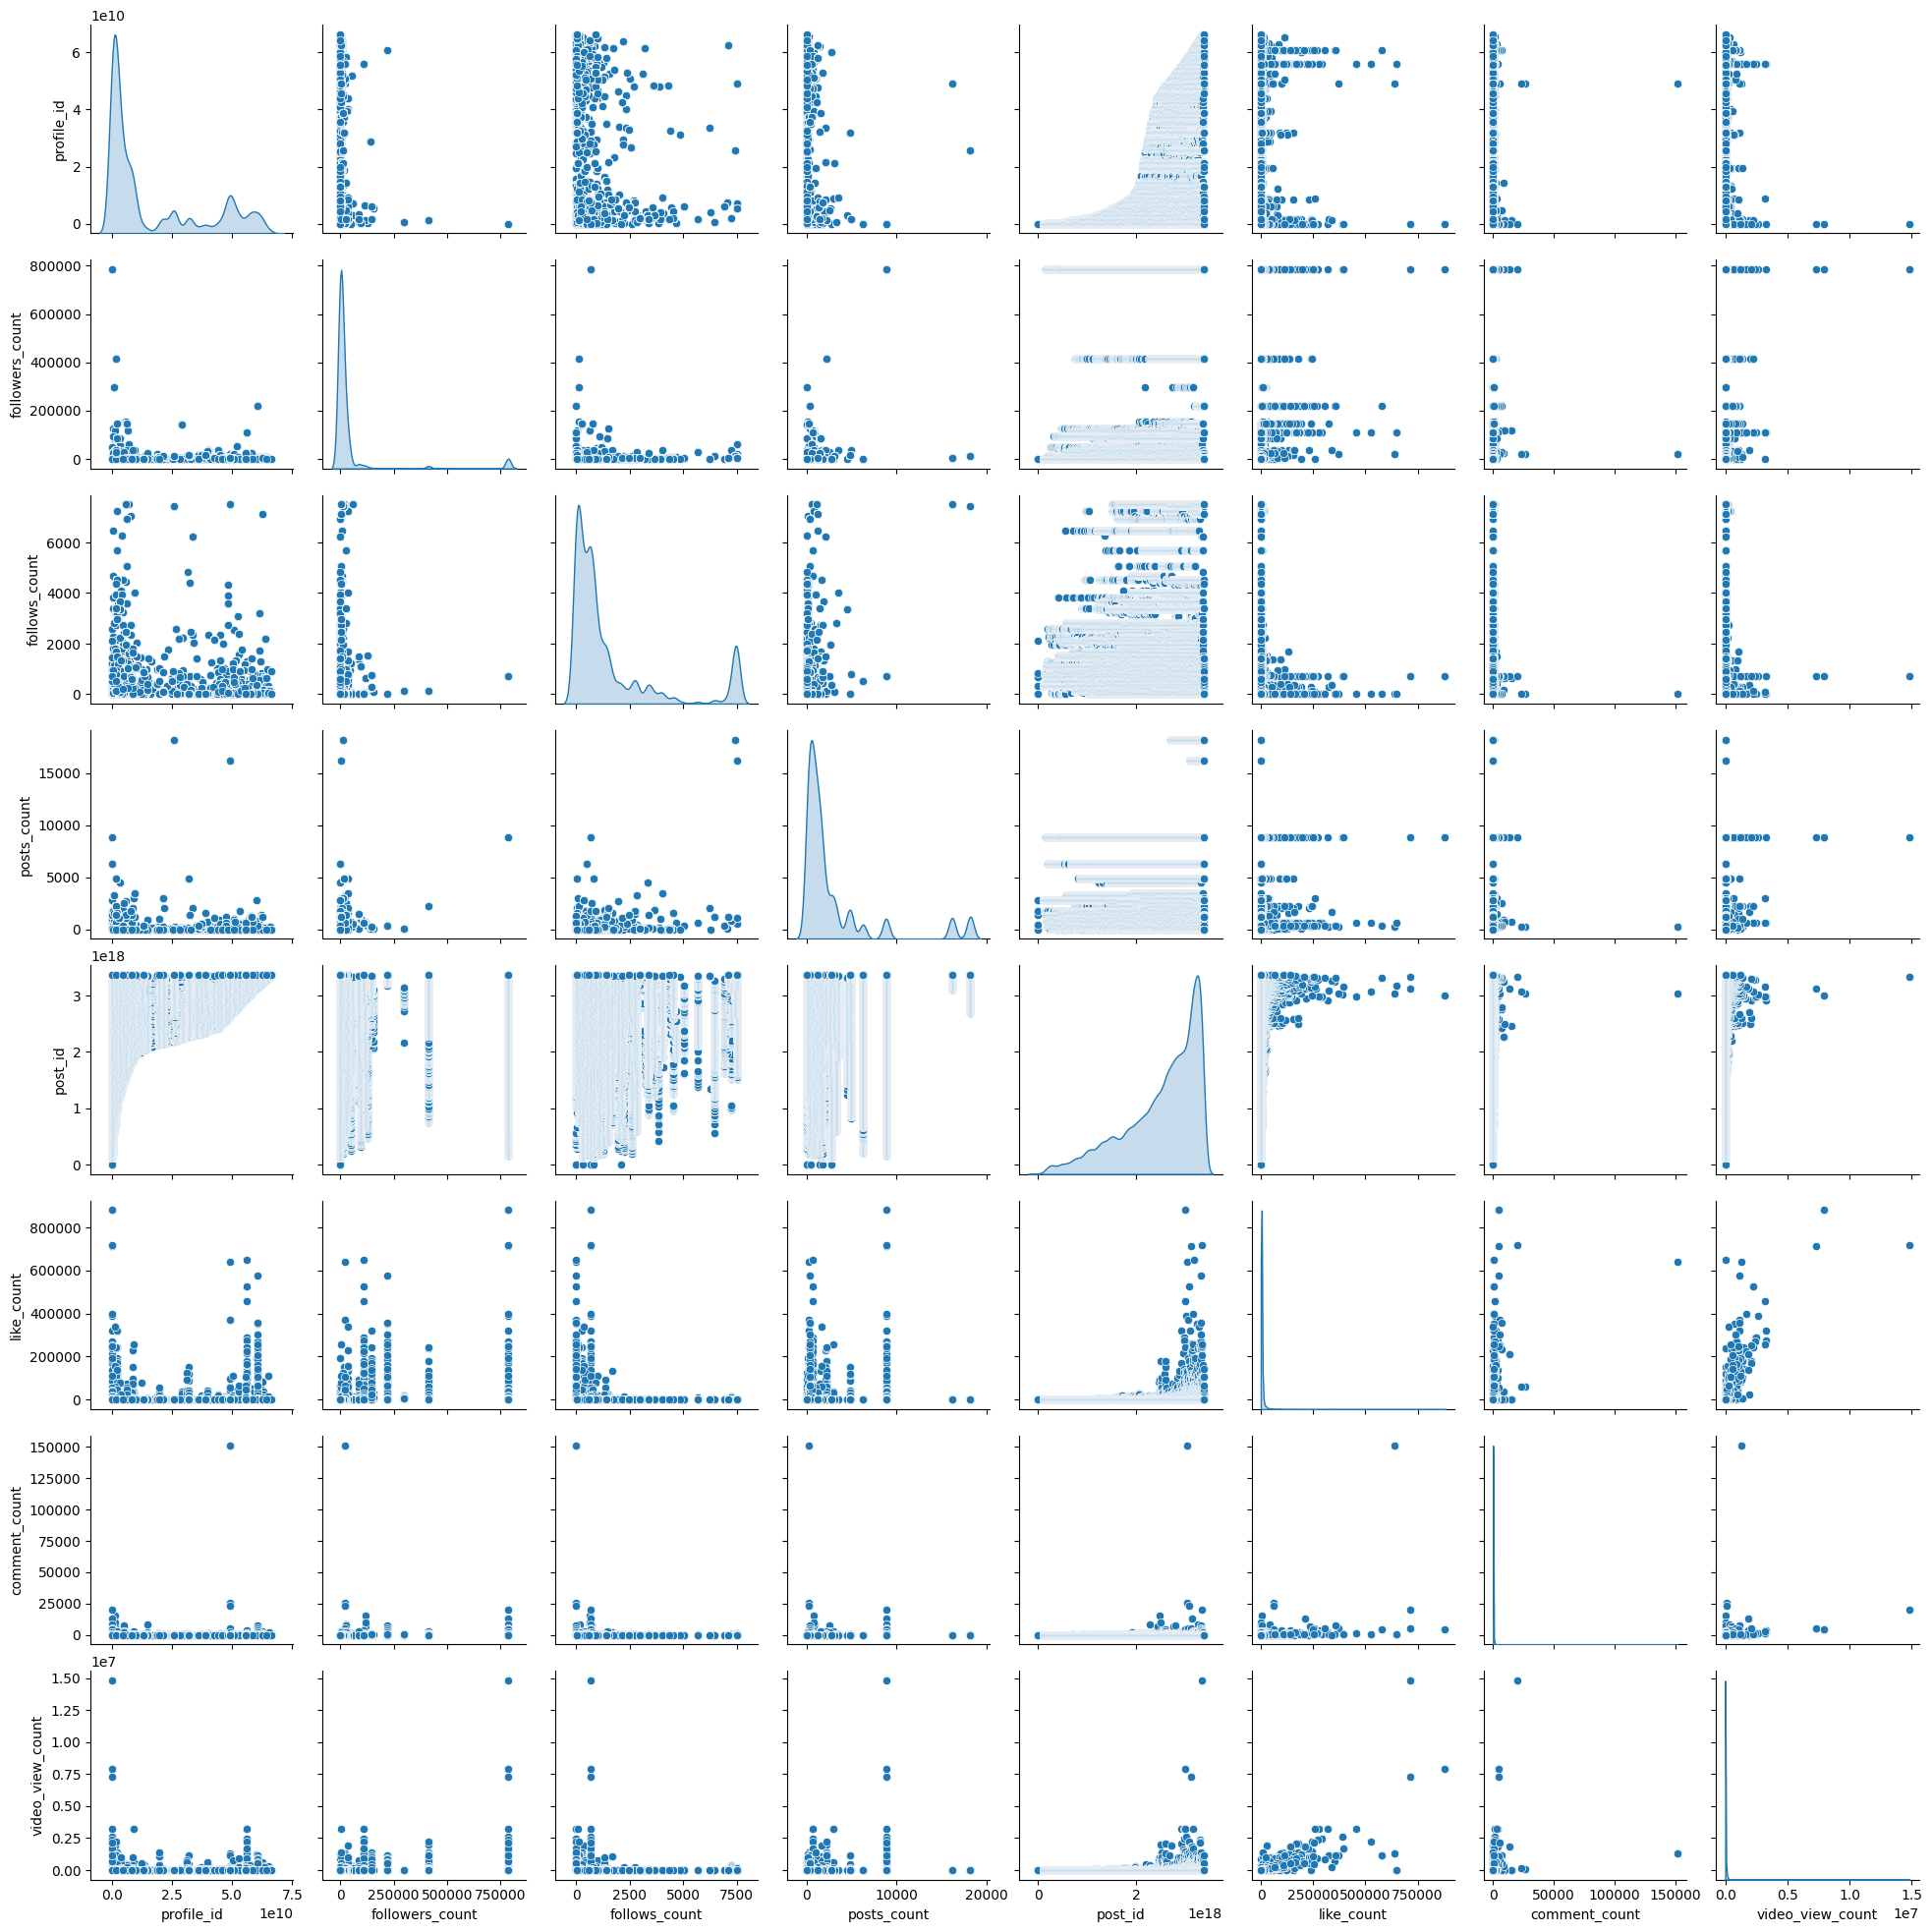

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Pairplot to visualize relationships
sns.pairplot(df, diag_kind='kde')
plt.show()

In [15]:
import numpy as np
print("Checking for NaNs or Infs in the dataframe:")
print(df_grouped.isna().sum())
# print(np.isinf(df_grouped).sum())

# Remove rows with NaNs or Infs
df_grouped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_grouped.dropna(inplace=True)


print(df_grouped.isna().sum())


Checking for NaNs or Infs in the dataframe:
profile_id                    0
username                      0
followers_count               0
follows_count                 0
posts_count                   0
total_likes                   0
total_comments                0
total_views                   0
engagement_rate               0
interection_rate              0
engagement_per_post           0
engagement_normalized         2
expected_genuine_followers    0
fake_followers                0
fake_follower_percentage      2
dtype: int64
profile_id                    0
username                      0
followers_count               0
follows_count                 0
posts_count                   0
total_likes                   0
total_comments                0
total_views                   0
engagement_rate               0
interection_rate              0
engagement_per_post           0
engagement_normalized         0
expected_genuine_followers    0
fake_followers                0
fake_follower_p

In [16]:
features = ['followers_count', 'follows_count', 'posts_count', 'total_likes', 'total_comments', 'total_views', 
            'engagement_per_post', 'engagement_normalized']

# Calculate correlation and p-values
significant_vars = []
for feature in features:
    correlation, p_value = stats.pearsonr(df_grouped[feature], df_grouped['fake_follower_percentage'])
    if p_value < 0.05:
        significant_vars.append(feature)
    print(f"Correlation between {feature} and fake_follower_percentage: {correlation}, p-value: {p_value}")

# Display significant variables
print("Significant variables:", significant_vars)

Correlation between followers_count and fake_follower_percentage: 0.10518113991572828, p-value: 0.0010669907718320727
Correlation between follows_count and fake_follower_percentage: 0.2508728027662418, p-value: 2.574756057234982e-15
Correlation between posts_count and fake_follower_percentage: 0.20977578556725, p-value: 4.657652832680193e-11
Correlation between total_likes and fake_follower_percentage: 0.031195050092989535, p-value: 0.3330260728023589
Correlation between total_comments and fake_follower_percentage: 0.07062824085737156, p-value: 0.02824087810154959
Correlation between total_views and fake_follower_percentage: 0.030893605786910184, p-value: 0.3377210824311748
Correlation between engagement_per_post and fake_follower_percentage: -0.1101390161571732, p-value: 0.0006093786095412928
Correlation between engagement_normalized and fake_follower_percentage: -0.12366955459576805, p-value: 0.00011737671650082113
Significant variables: ['followers_count', 'follows_count', 'posts_co

Analysis:
Features with p-values > 0.05 are generally considered not statistically significant. Therefore, we can consider removing total_likes and total_views as their p-values are 0.333 and 0.338, respectively, indicating that they do not significantly contribute to the prediction of fake_follower_percentage.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting significant variables
X = df_grouped[['followers_count', 'follows_count', 'posts_count', 'total_comments', 'engagement_per_post', 'engagement_normalized']]
y = df_grouped['fake_follower_percentage']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predicting with the best model
y_pred_rf = best_rf.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Random Forest Mean Squared Error: 21.823525972306943
Random Forest R-squared: 0.9833465349853024


In [18]:
results_df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})


In [19]:
results_df_rf

,Actual,Predicted
891,96.686888,97.160476
468,62.703963,61.800407
168,48.949135,51.094552
405,99.924287,99.819551
70,0.000000,0.000000
...,...,...
961,88.034188,89.887426
215,74.729813,75.363747
554,0.000000,0.000000
33,53.679515,52.429138


In [21]:
import pickle

# Save the model to a file
with open('Fake_Follower_predictor.pkl', 'wb') as file:
    pickle.dump(best_rf, file)